# Predator Analysis: OV

## Evaluation on _CancerMine_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_OV_CancerMine.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 17th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display

In [2]:
# Paths
## SNVs
SNV_COMMON_PATH = "C:/Users/ibrah/Desktop/TUSEB_Study/Data_Collection_and_Filtering/SNV/"
SNV_OV_PATH = SNV_COMMON_PATH + "SNV_OV_hg38.csv"

PREDICTION_ID = "37bf1637/"
PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/ov_prediction_2021-11-17/" + PREDICTION_ID
PREDICTION_OV_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_soft_2021-11-17.csv"

ELASPIC_RESULTS_COMMON_PATH = "../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/"  # elaspic_results_datasets
OV_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "OV_Core_2021-11-17.txt"
OV_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "OV_Interface_2021-11-17.txt"

# Patient Interaction data
OV_PATIENT_INTERACTION_DATA_PATH = "../data/patient_interaction_datasets/OV_patient_interactions_analysis_table_2021-11-17.xlsx"

# CANCER MINE GENES
CANCER_MINE_ALL_PATH = "../data/cancer_mine_genes/all_genes_2021-10-26.txt"
CANCER_MINE_OVARIAN_PATH = "../data/cancer_mine_genes/ovarian_genes_2021-10-26.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [3]:
from PredatorAnalysis import PredatorAnalysis

In [4]:
predator_analysis = PredatorAnalysis(
    tcga="ov",
    snv_path=SNV_OV_PATH,
    prediction_data_path=PREDICTION_OV_REDUCED_PATH,
    prediction_id=PREDICTION_ID,
    elaspic_core_path=OV_CORE_PATH,
    elaspic_interface_path=OV_INTERFACE_PATH,
    patient_interaction_data_path=OV_PATIENT_INTERACTION_DATA_PATH,
    reference_data_name="cancermine",
    reference_data_spec_cohort_path=CANCER_MINE_OVARIAN_PATH,
    reference_data_path=CANCER_MINE_ALL_PATH
)

2021-11-17 20:32:35 | INFO     | PredatorAnalysis |  - - Predator Analysis - - 
2021-11-17 20:32:35 | INFO     | PredatorAnalysis | TCGA: ov
2021-11-17 20:32:35 | INFO     | PredatorAnalysis | PREDICTION ID: 37bf1637/
2021-11-17 20:32:35 | INFO     | helpers.helpers_analysis.loaders | Loading ov SNV datasets ..
2021-11-17 20:32:40 | DEBUG    | helpers.helpers_analysis.loaders | ov SNV data size: (75168, 121)
2021-11-17 20:32:40 | DEBUG    | helpers.helpers_analysis.loaders | ov SNV data processed size: (38486, 121)
2021-11-17 20:32:40 | INFO     | helpers.helpers_analysis.loaders | ov SNV datasets are loaded.
2021-11-17 20:32:40 | INFO     | helpers.helpers_analysis.loaders | Loading ov Prediction dataset ..
2021-11-17 20:32:40 | DEBUG    | helpers.helpers_analysis.loaders | ov Prediction data shape: (2513, 5)
2021-11-17 20:32:40 | INFO     | helpers.helpers_analysis.loaders | ov Prediction dataset is loaded.
2021-11-17 20:32:40 | INFO     | helpers.helpers_analysis.loaders | Loading o

# Datasets

##  1. SNV Datasets

In [5]:
# Original SNV Dataset
print(predator_analysis.data_materials["ov_snv_data"].shape)

(75168, 121)


In [6]:
# Processed SNV Dataset
print(predator_analysis.data_materials["ov_snv_data_processed"].shape)

(38486, 121)


In [7]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["ov_snv_data_simplified"].shape)
predator_analysis.data_materials["ov_snv_data_simplified"].head(3)

(38486, 4)


Hugo_Symbol SWISSPROT HGVSp_Short Tumor_Sample_Barcode
0       UBE4B    O95155      I1201L         TCGA-61-2092
1      AKR7A3    O95154       Y209H         TCGA-61-2092
2     THEMIS2    Q5TEJ8       M434V         TCGA-61-2092

## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [8]:
# Core data 
print(predator_analysis.data_materials["ov_elaspic_core_data"].shape)
predator_analysis.data_materials["ov_elaspic_core_data"].head(3)

(12641, 103)


Input_identifier UniProt_ID Mutation Status  Type COSMIC_mut_ID  \
0           O95155     O95155   I1201L   done  core             -   
1           O95154     O95154    Y209H   done  core             -   
2           O75578     O75578    N927Y   done  core             -   

  ClinVar_mut_ID UniProt_mut_ID      Domain_name   Domain_clan  ...  \
0              -              -       Ufd2P_core    Ufd2P_core  ...   
1              -              -     Aldo_ket_red  Aldo_ket_red  ...   
2              -              -  Integrin_alpha2         E-set  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  626.0                      -                        -   
1                  324.0                      -                        -   
2                  474.0                      -                        -   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                       -                       -                          -   
1                       -                       -                          -   
2                       -                       -                          -   

  Interface_hydrophilic_area Interface_total_area  \
0                          -                    -   
1                          -                    -   
2                          -                    -   

  Interface_contact_distance_wt Interface_contact_distance_mut  
0                             -                              -  
1                             -                              -  
2                             -                              -  

[3 rows x 103 columns]

In [9]:
# Core data simplified
print(predator_analysis.data_materials["ov_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["ov_elaspic_core_data_simplified"].head(3)

(12611, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     O95155   I1201L                     -
1     O95154    Y209H                     -
2     O75578    N927Y                     -

### 2.2 `Interface` Datasets

In [10]:
print(predator_analysis.data_materials["ov_elaspic_interface_data"].shape)
predator_analysis.data_materials["ov_elaspic_interface_data"].head(3)  ## <-- i was here

(5047, 103)


Input_identifier UniProt_ID Mutation Status       Type COSMIC_mut_ID  \
0           P08134     P08134     D59E   done  interface     COSM72427   
1           P08134     P08134     D59E   done  interface     COSM72427   
2           P62993     P62993      A3V   done  interface             -   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -              -         Ras         Ras  ...   
1              -              -         Ras         Ras  ...   
2              -              -       SH3_1       SH3_1  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  388.0                53.3423                  55.3148   
1                  344.0                62.3140                  63.0691   
2                  280.0                23.2774                  24.5177   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                 37.8150                 37.8150                    719.095   
1                 32.5038                 32.5038                     598.71   
2                122.5120                122.5120                     170.81   

  Interface_hydrophilic_area Interface_total_area  \
0                    461.785              1180.88   
1                     417.74              1016.46   
2                    120.515              291.325   

  Interface_contact_distance_wt  Interface_contact_distance_mut  
0                       3.18062                         3.18062  
1                       3.80414                         3.80414  
2                       4.63364                         4.63364  

[3 rows x 103 columns]

In [11]:
print(predator_analysis.data_materials["ov_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["ov_elaspic_interface_processed_data"].head(3)

(2582, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P08134     D59E                P52565
1     P62993      A3V                Q9H8V3
2     P62993      A3V                Q14155

### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *ov_elaspic_core_data_simplified*
+ *ov_interface_processed*

In [12]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["ov_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["ov_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["ov_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["ov_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     O95155   I1201L                     -
1     O95154    Y209H                     -
2     O75578    N927Y                     -

Data dimensions: (12611, 3)

ELASPIC INTERFACE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P08134     D59E                P52565
1     P62993      A3V                Q9H8V3
2     P62993      A3V                Q14155

Data dimensions: (2582, 3)


In [13]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["ov_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["ov_elaspic_core_and_interface_data"].head(3)

(15193, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     O95155   I1201L                     -
1     O95154    Y209H                     -
2     O75578    N927Y                     -

## 3. Prediction Datasets

**Note**: We decided to drop some entries due to invalid prediction case, thus interface data and prediction data are not the same.

In [14]:
print(predator_analysis.data_materials["ov_prediction_data"].shape)
predator_analysis.data_materials["ov_prediction_data"].head(3)

(2513, 5)


UniProt_ID Mutation Interactor_UniProt_ID  Prediction  Median_Probability
0     P08134     D59E                P52565           0             0.28821
1     P62993      A3V                Q9H8V3           0             0.44397
2     P62993      A3V                Q14155           1             0.51214

## 4. CancerMine Genes

In [15]:
print(len(predator_analysis.data_materials['cancermine_ov_genes']))
predator_analysis.data_materials['cancermine_ov_genes'][:5]

78


['BRCA1', 'ERBB2', 'BRCA2', 'MYC', 'KRAS']

In [16]:
print(len(predator_analysis.data_materials['cancermine_all_genes']))
predator_analysis.data_materials['cancermine_all_genes'][:5]

1024


['ERBB2', 'ABL1', 'EGFR', 'KRAS', 'BRAF']

# Prepare Analysis

In [17]:
predator_analysis.prepare_analysis()

2021-11-17 20:32:50 | DEBUG    | PredatorAnalysis | ov_elaspic_proteins loaded.
2021-11-17 20:32:50 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC ov: 6674


Retrieving Gene IDs from UniProt API .. :   0%|          | 0/6674 [00:00<?, ?it/s]

2021-11-17 20:32:52 | DEBUG    | PredatorAnalysis | ov_protein_to_gene_dict loaded.


  0%|          | 0/6674 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVK6 	 0
3 	 A0AVT1 	 8
4 	 A0FGR9 	 3
2021-11-17 20:33:00 | DEBUG    | PredatorAnalysis | ov_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/6674 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVK6 	 0
3 	 A0AVT1 	 8
4 	 A0FGR9 	 2
2021-11-17 20:33:12 | DEBUG    | PredatorAnalysis | ov_protein_to_num_unique_interactors loaded.
2021-11-17 20:33:12 | DEBUG    | PredatorAnalysis | Number of patients in ov: 436.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [18]:
print('Number of proteins in ELASPIC OV:', len(predator_analysis.data_materials["ov_elaspic_proteins"]))

Number of proteins in ELASPIC OV: 6674


## 2. Genes

In [19]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["ov_protein_to_gene_dict"].items())[:5]

[('A0AV96', 'RBM47'),
 ('A0AVF1', 'TTC26'),
 ('A0AVK6', 'E2F8'),
 ('A0AVT1', 'UBA6'),
 ('A0FGR9', 'ESYT3')]

## 3. ELASPIC Number of Interface Entries

In [20]:
list(predator_analysis.data_materials["ov_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVK6', 0), ('A0AVT1', 8), ('A0FGR9', 3)]

In [21]:
# TP53
predator_analysis.data_materials["ov_protein_to_num_elaspic_interface_entries"]["P04637"]  # 166

166

## 4. ELASPIC Number of Unique Interactors

In [22]:
list(predator_analysis.data_materials["ov_protein_to_num_unique_interactors"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVK6', 0), ('A0AVT1', 8), ('A0FGR9', 2)]

In [23]:
# TP53
predator_analysis.data_materials["ov_protein_to_num_unique_interactors"]["P04637"]  # 19

19

## 5. Patients

In [24]:
print(f'Number of patients {len(predator_analysis.data_materials["ov_patients"])}.')  # 436.

Number of patients 436.


# Analysis Table Construction

In [25]:
predator_analysis.construct_analysis_table()

2021-11-17 20:33:14 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2021-11-17 20:33:14 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2021-11-17 20:33:14 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2021-11-17 20:33:14 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2021-11-17 20:33:25 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2021-11-17 20:33:35 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2021-11-17 20:33:35 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/436 [00:00<?, ?it/s]

2021-11-17 20:39:15 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/436 [00:00<?, ?it/s]

2021-11-17 20:43:49 | DEBUG    | PredatorAnalysis | Adding `NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR` column ..
2021-11-17 20:44:11 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/436 [00:00<?, ?it/s]

2021-11-17 20:49:49 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2021-11-17 20:49:49 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/436 [00:00<?, ?it/s]

2021-11-17 20:53:37 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2021-11-17 20:53:37 | DEBUG    | PredatorAnalysis | ov_preliminary_data is constructed.


In [26]:
predator_analysis.data_materials["ov_preliminary_data"]

PROTEIN      GENE  NUM_ELASPIC_INTERFACE_ENTRIES  NUM_DISRUPTIVE_ENTRIES  \
0     A0AV96     RBM47                              0                       0   
1     A0AVF1     TTC26                              0                       0   
2     A0AVK6      E2F8                              0                       0   
3     A0AVT1      UBA6                              8                       8   
4     A0FGR9     ESYT3                              3                       2   
...      ...       ...                            ...                     ...   
6669  Q9Y6X8      ZHX2                              0                       0   
6670  Q9Y6X9     MORC2                              0                       0   
6671  Q9Y6Y0  IVNS1ABP                              0                       0   
6672  Q9Y6Y9      LY96                              0                       0   
6673  Q9Y6Z7   COLEC10                              0                       0   

      NUM_INCR_NOEFF_ENTRIES  NUM_UNIQUE_INTERACTORS  PATIENT_CORE_COUNT  \
0                          0                       0                   1   
1                          0                       0                   1   
2                          0                       0                   1   
3                          0                       8                   0   
4                          1                       2                   0   
...                      ...                     ...                 ...   
6669                       0                       0                   1   
6670                       0                       0                   1   
6671                       0                       0                   1   
6672                       0                       0                   2   
6673                       0                       0                   1   

      PATIENT_INTERFACE_COUNT  NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR  \
0                           0                                             0   
1                           0                                             0   
2                           0                                             0   
3                           1                                             1   
4                           2                                             2   
...                       ...                                           ...   
6669                        0                                             0   
6670                        0                                             0   
6671                        0                                             0   
6672                        0                                             0   
6673                        0                                             0   

      BASELINE  OUR_METHOD  OUR_METHOD/BASELINE  ELASPIC_COVERAGE  \
0            0           0                  NaN                 1   
1            0           0                  NaN                 1   
2            0           0                  NaN                 1   
3            8           8             1.000000                 1   
4            3           2             0.666667                 2   
...        ...         ...                  ...               ...   
6669         0           0                  NaN                 1   
6670         0           0                  NaN                 1   
6671         0           0                  NaN                 1   
6672         0           0                  NaN                 2   
6673         0           0                  NaN                 1   

     CancerMine_STATUS CancerMine_STATUS (OV)  
0                    -                      -  
1                    -                      -  
2                    -                      -  
3                    -                      -  
4                    -                      -  
...                ...                    ...  
6669 

# ROC Curve Analysis

2021-11-17 20:53:38 | DEBUG    | PredatorAnalysis | Plotting ROC Curves ..


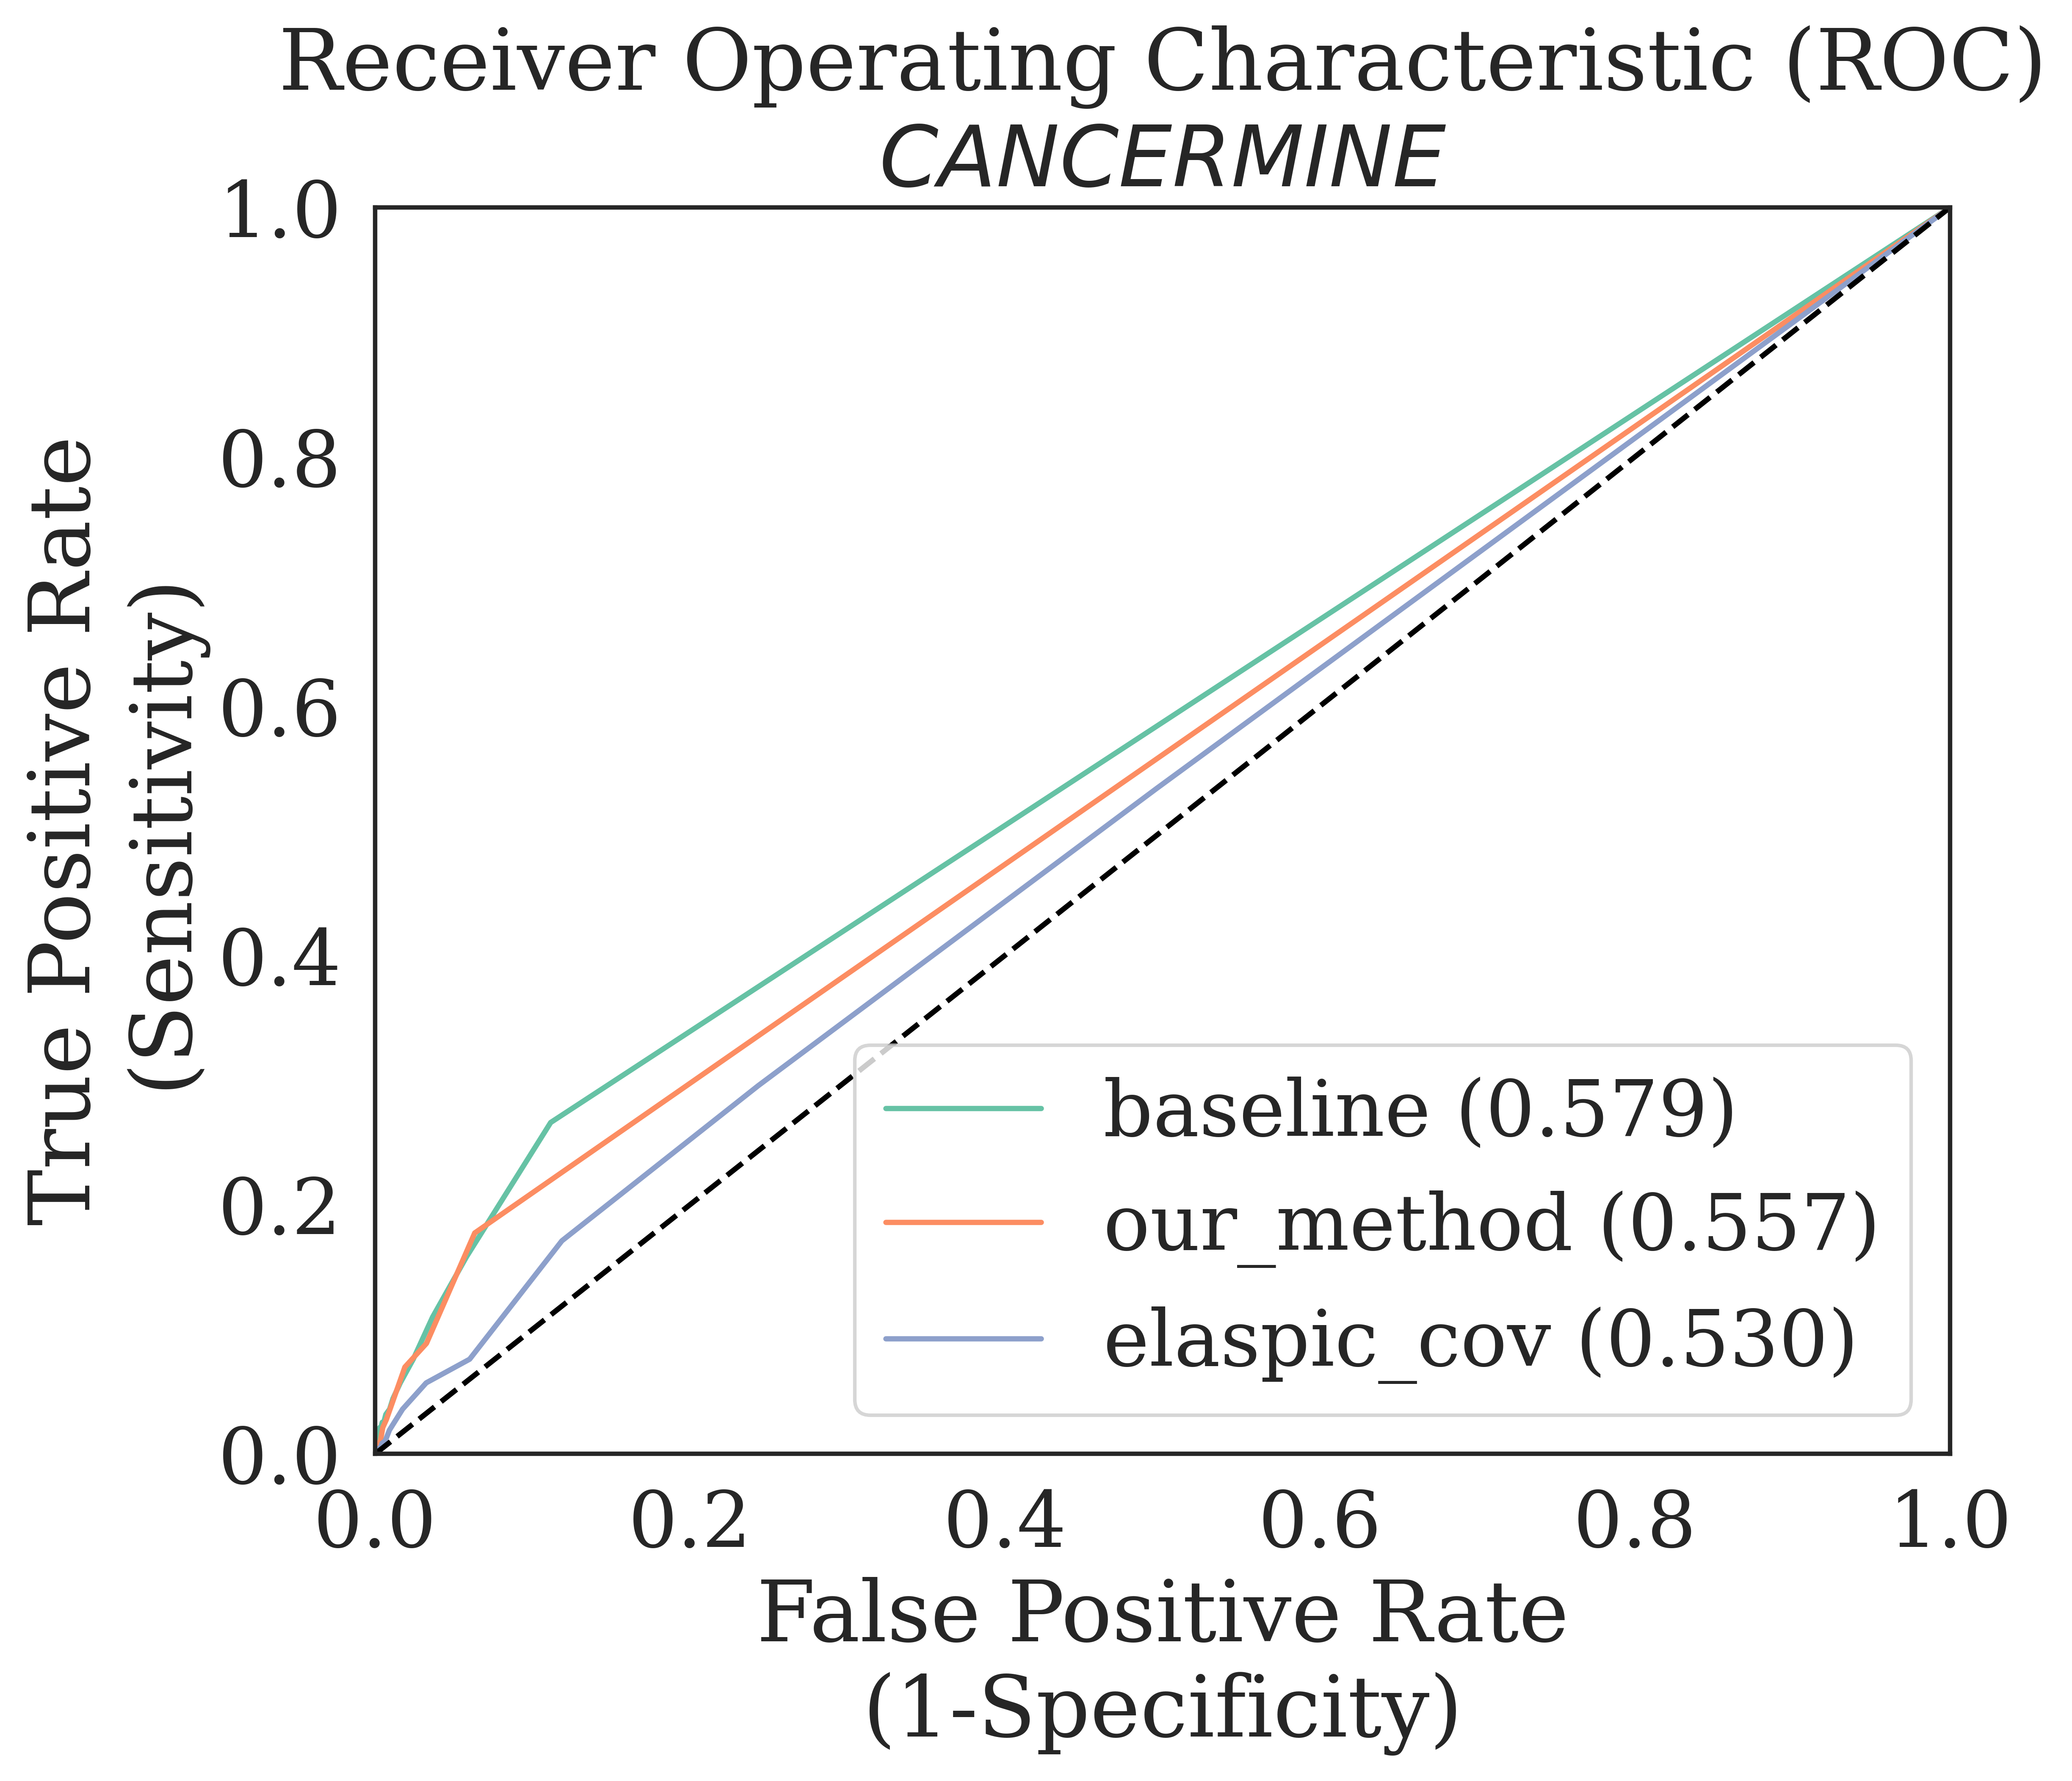

2021-11-17 20:53:41 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.579
2021-11-17 20:53:41 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.557
2021-11-17 20:53:41 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.530


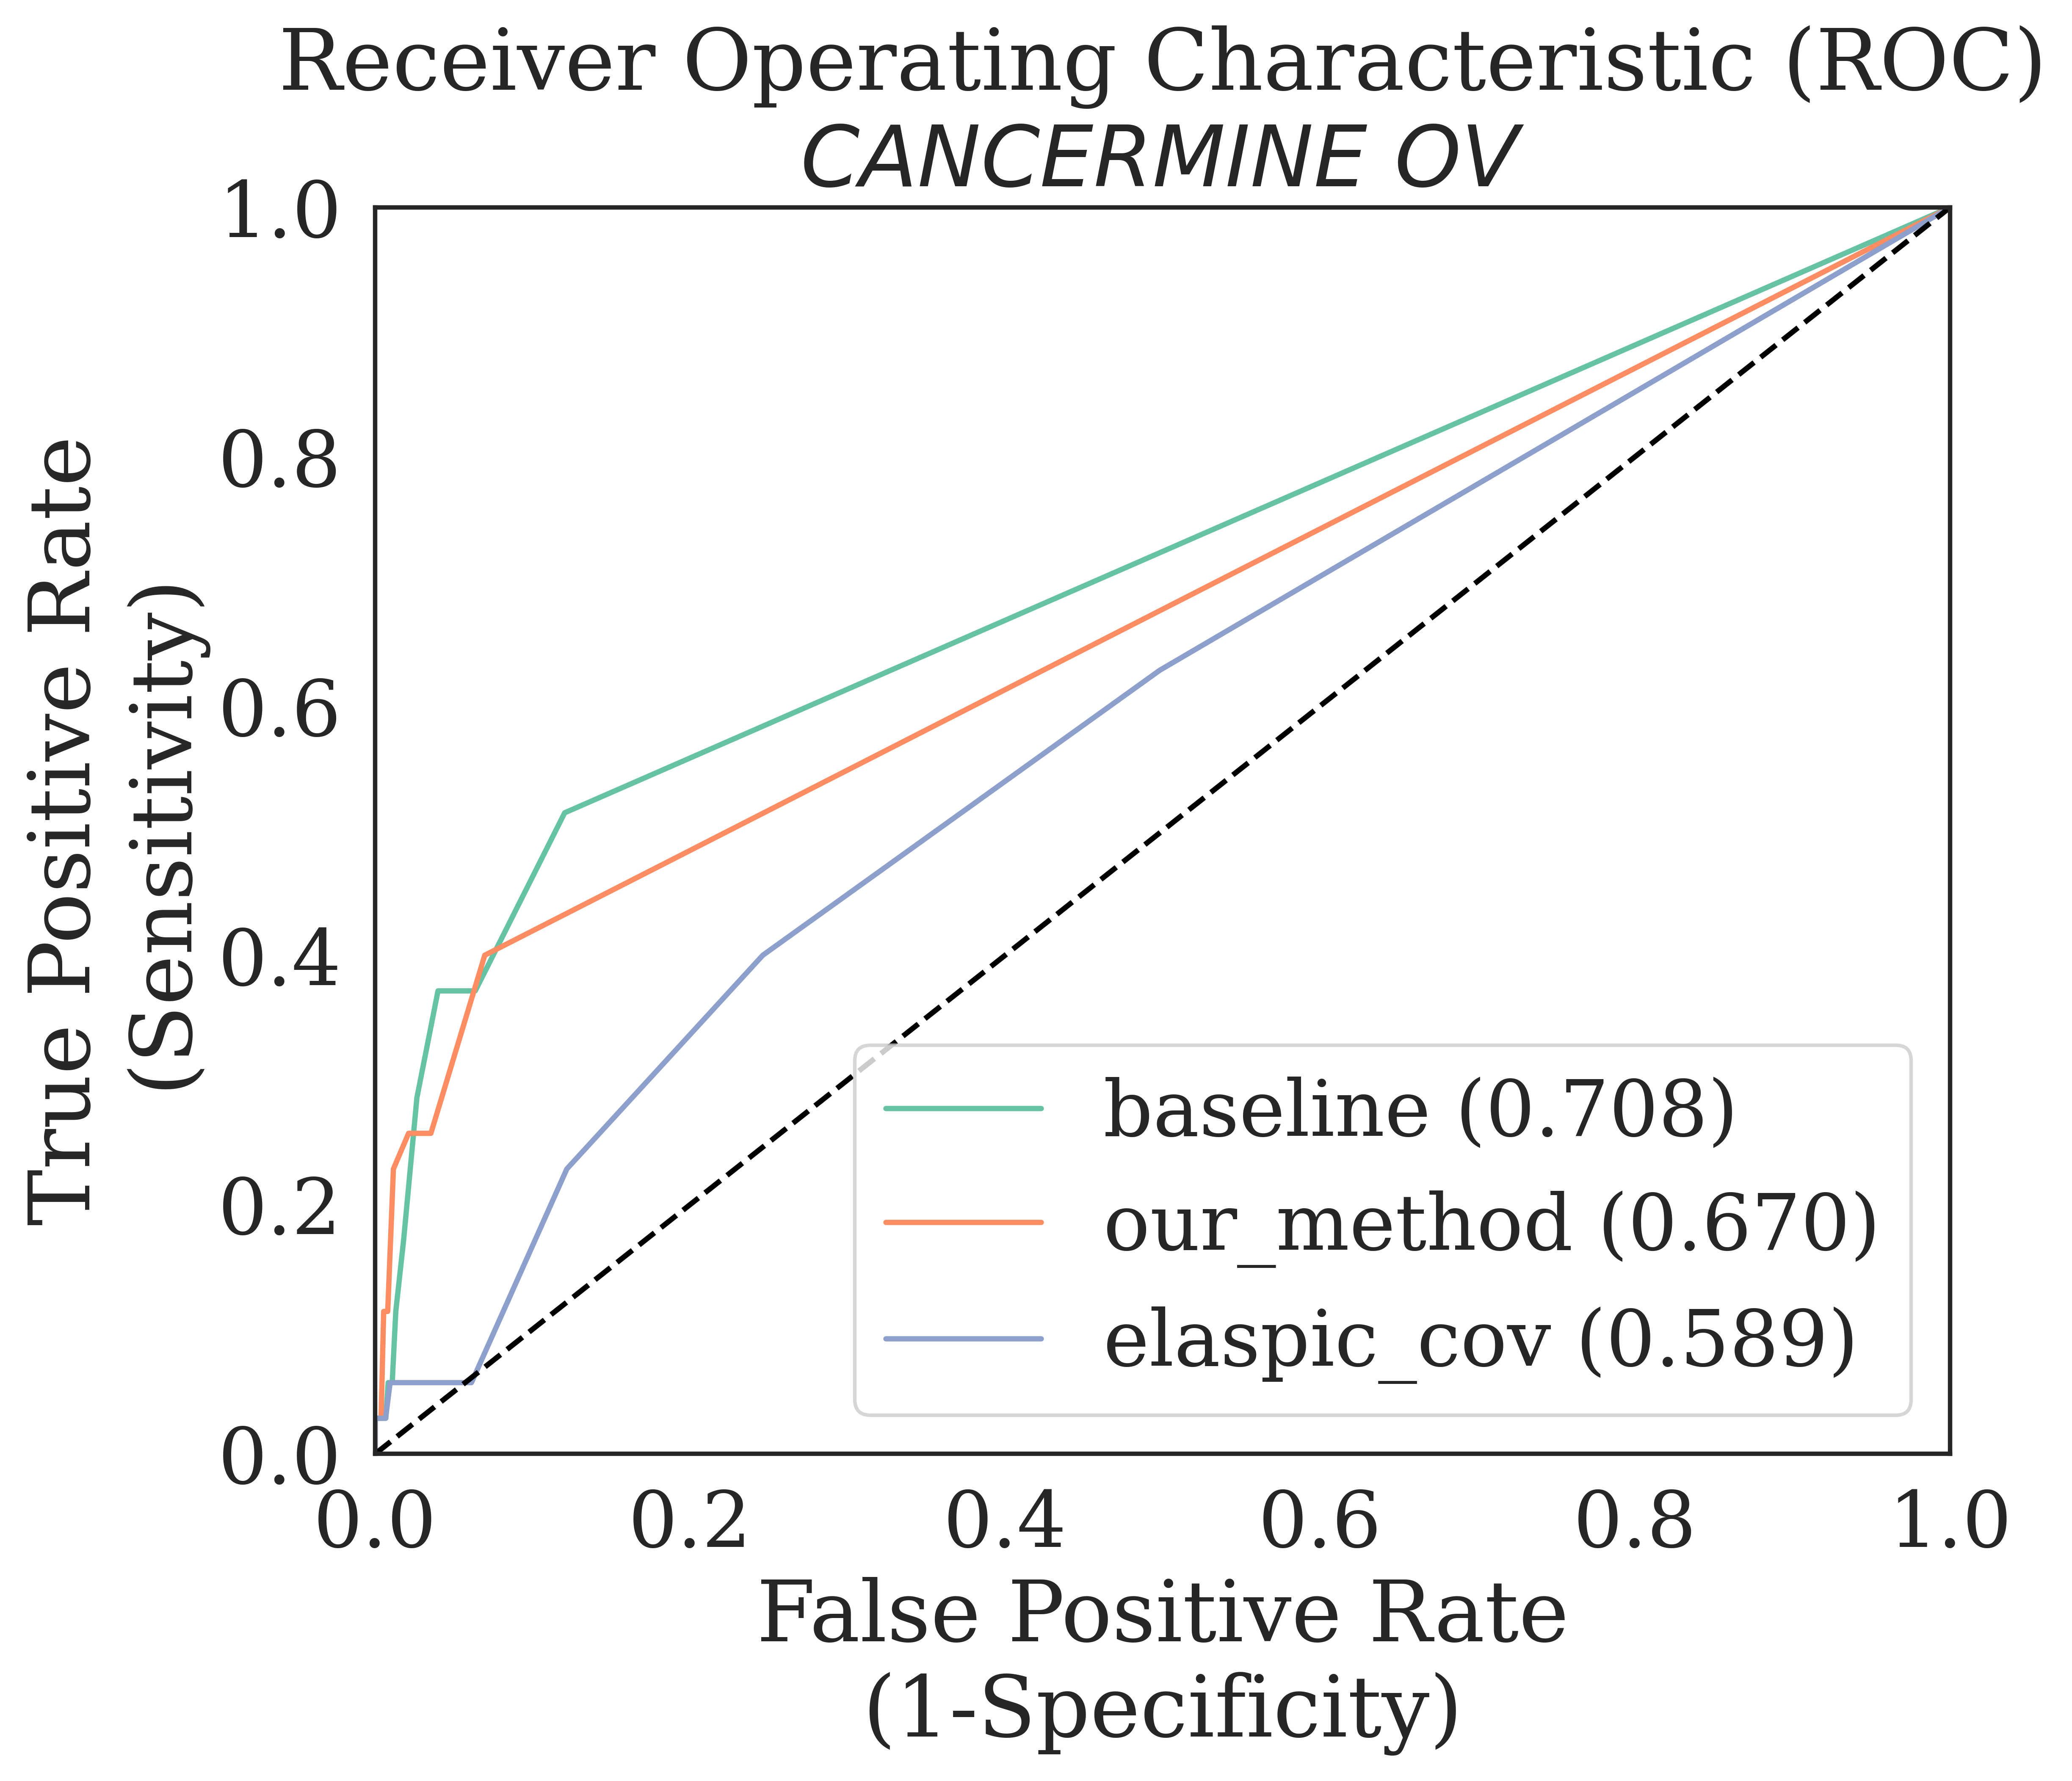

2021-11-17 20:53:44 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.708
2021-11-17 20:53:44 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.670
2021-11-17 20:53:44 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.589


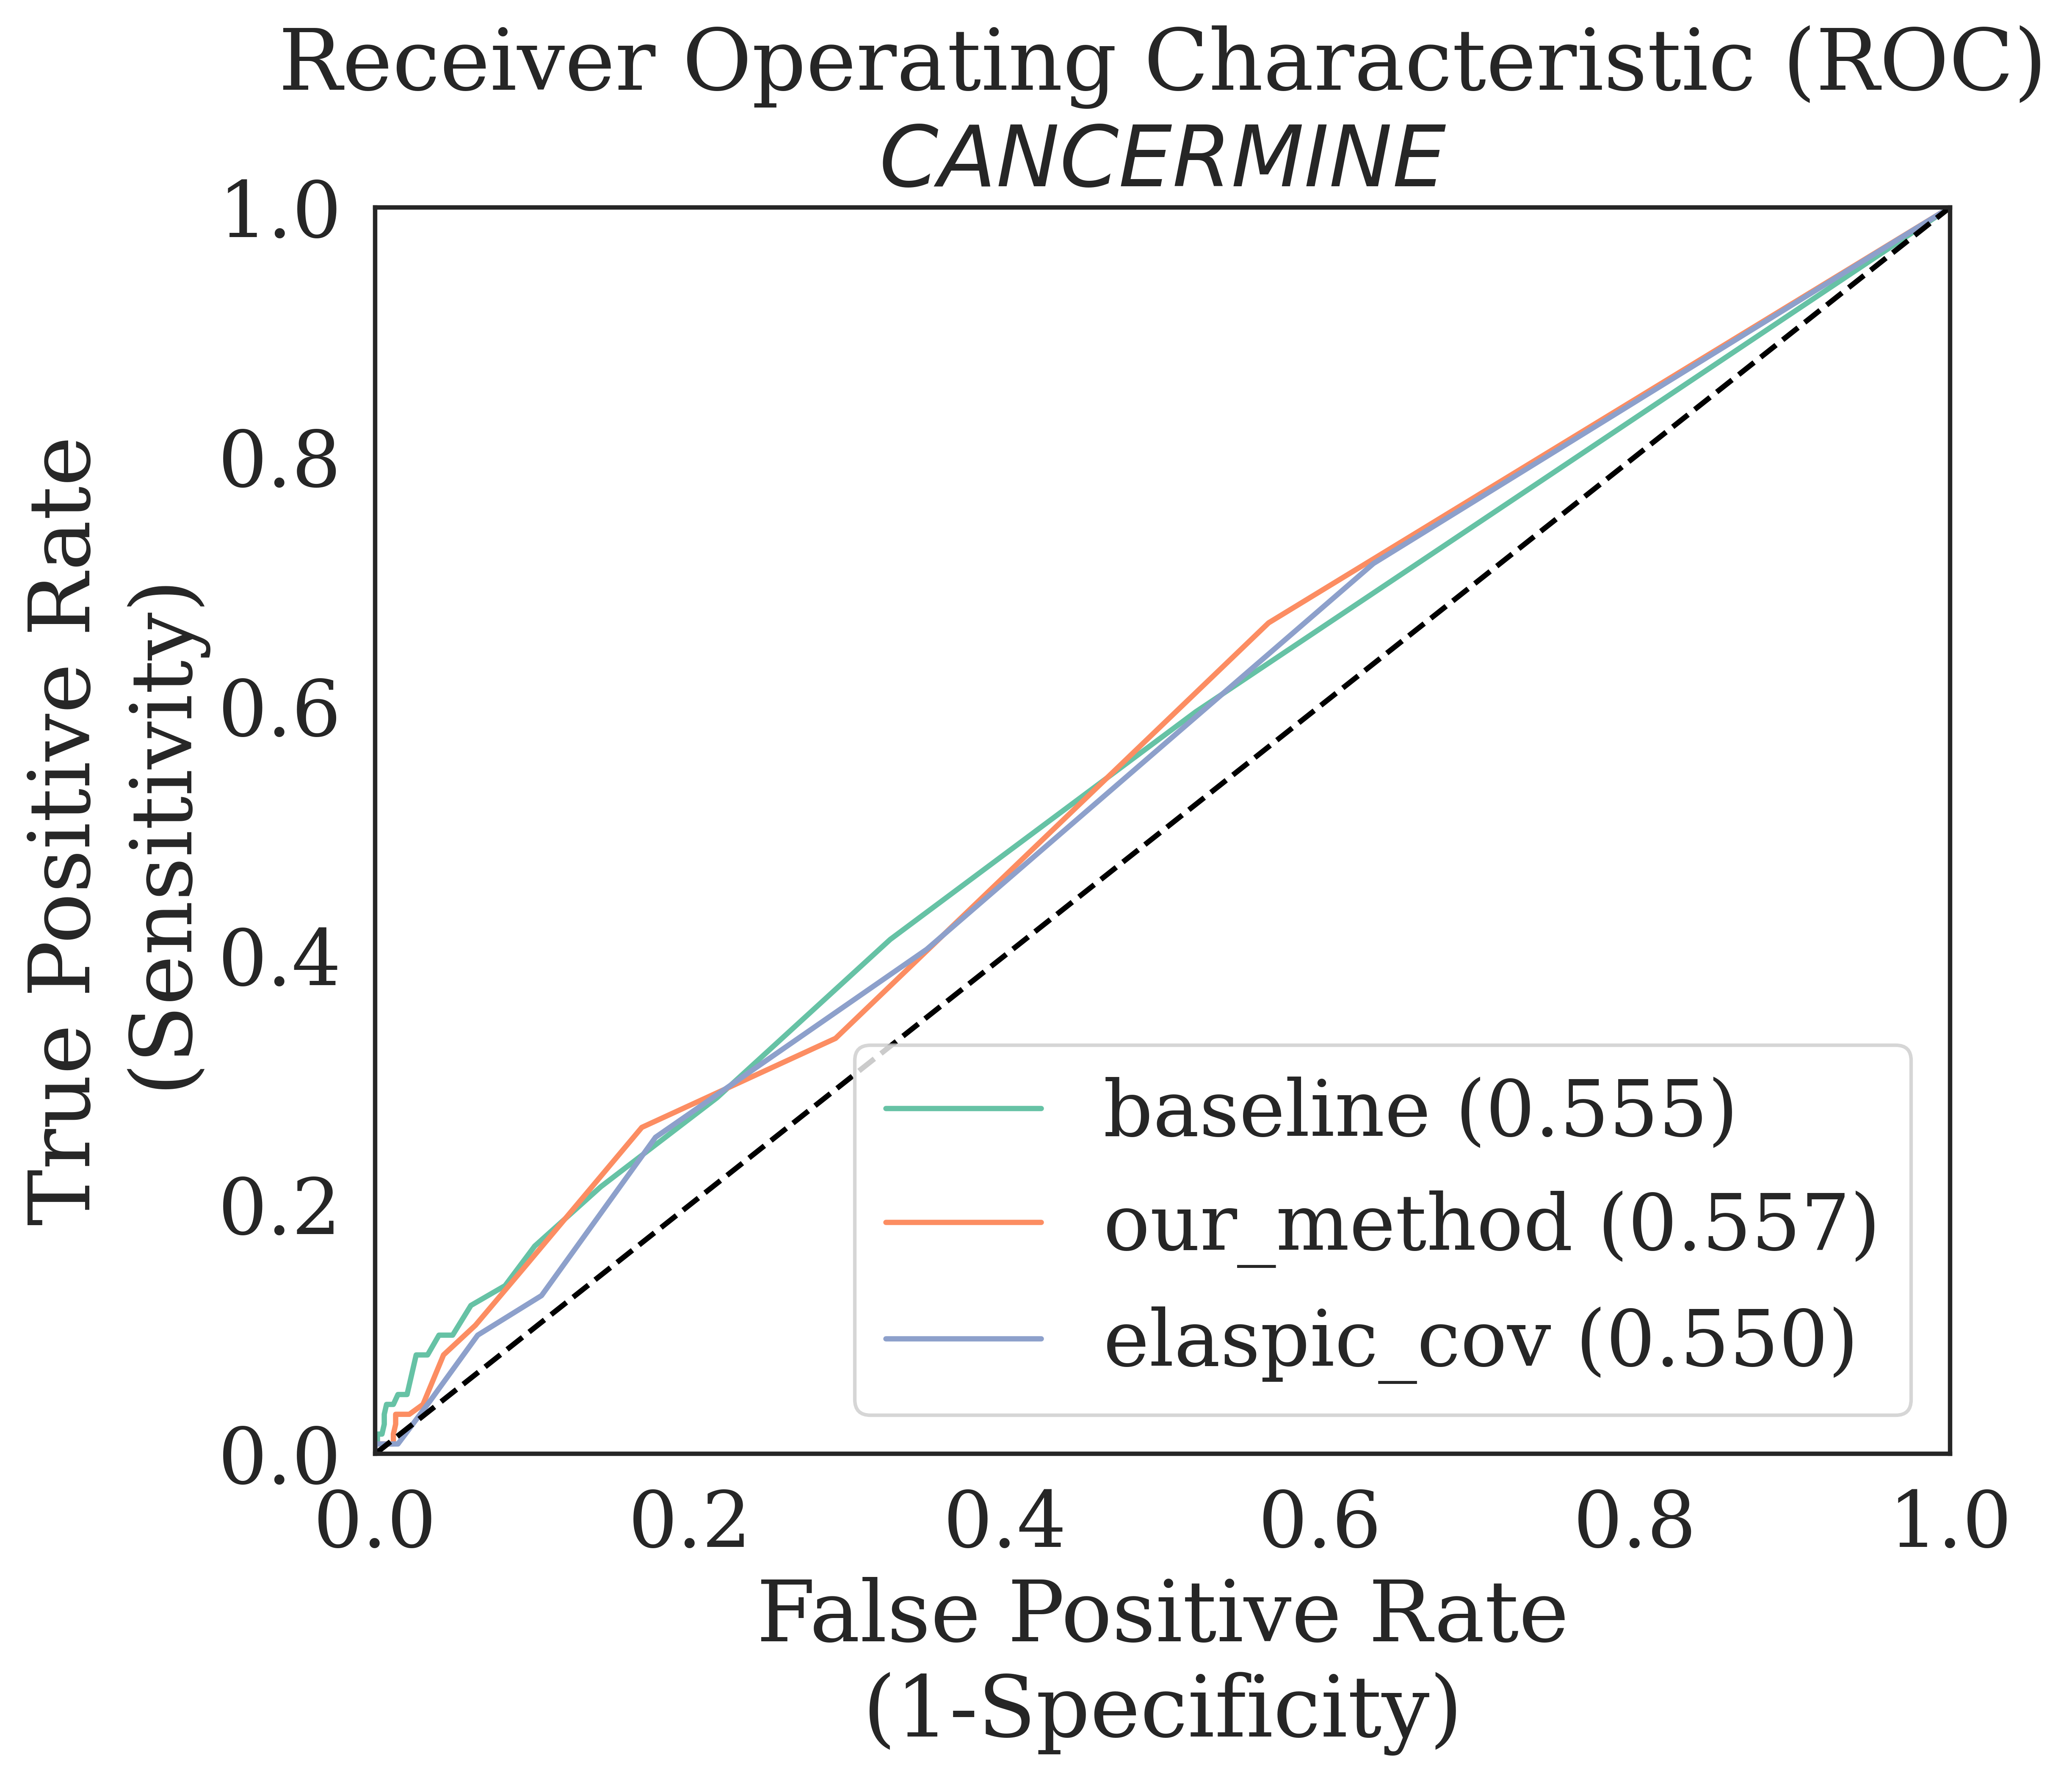

2021-11-17 20:53:47 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.555
2021-11-17 20:53:47 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.557
2021-11-17 20:53:47 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.550


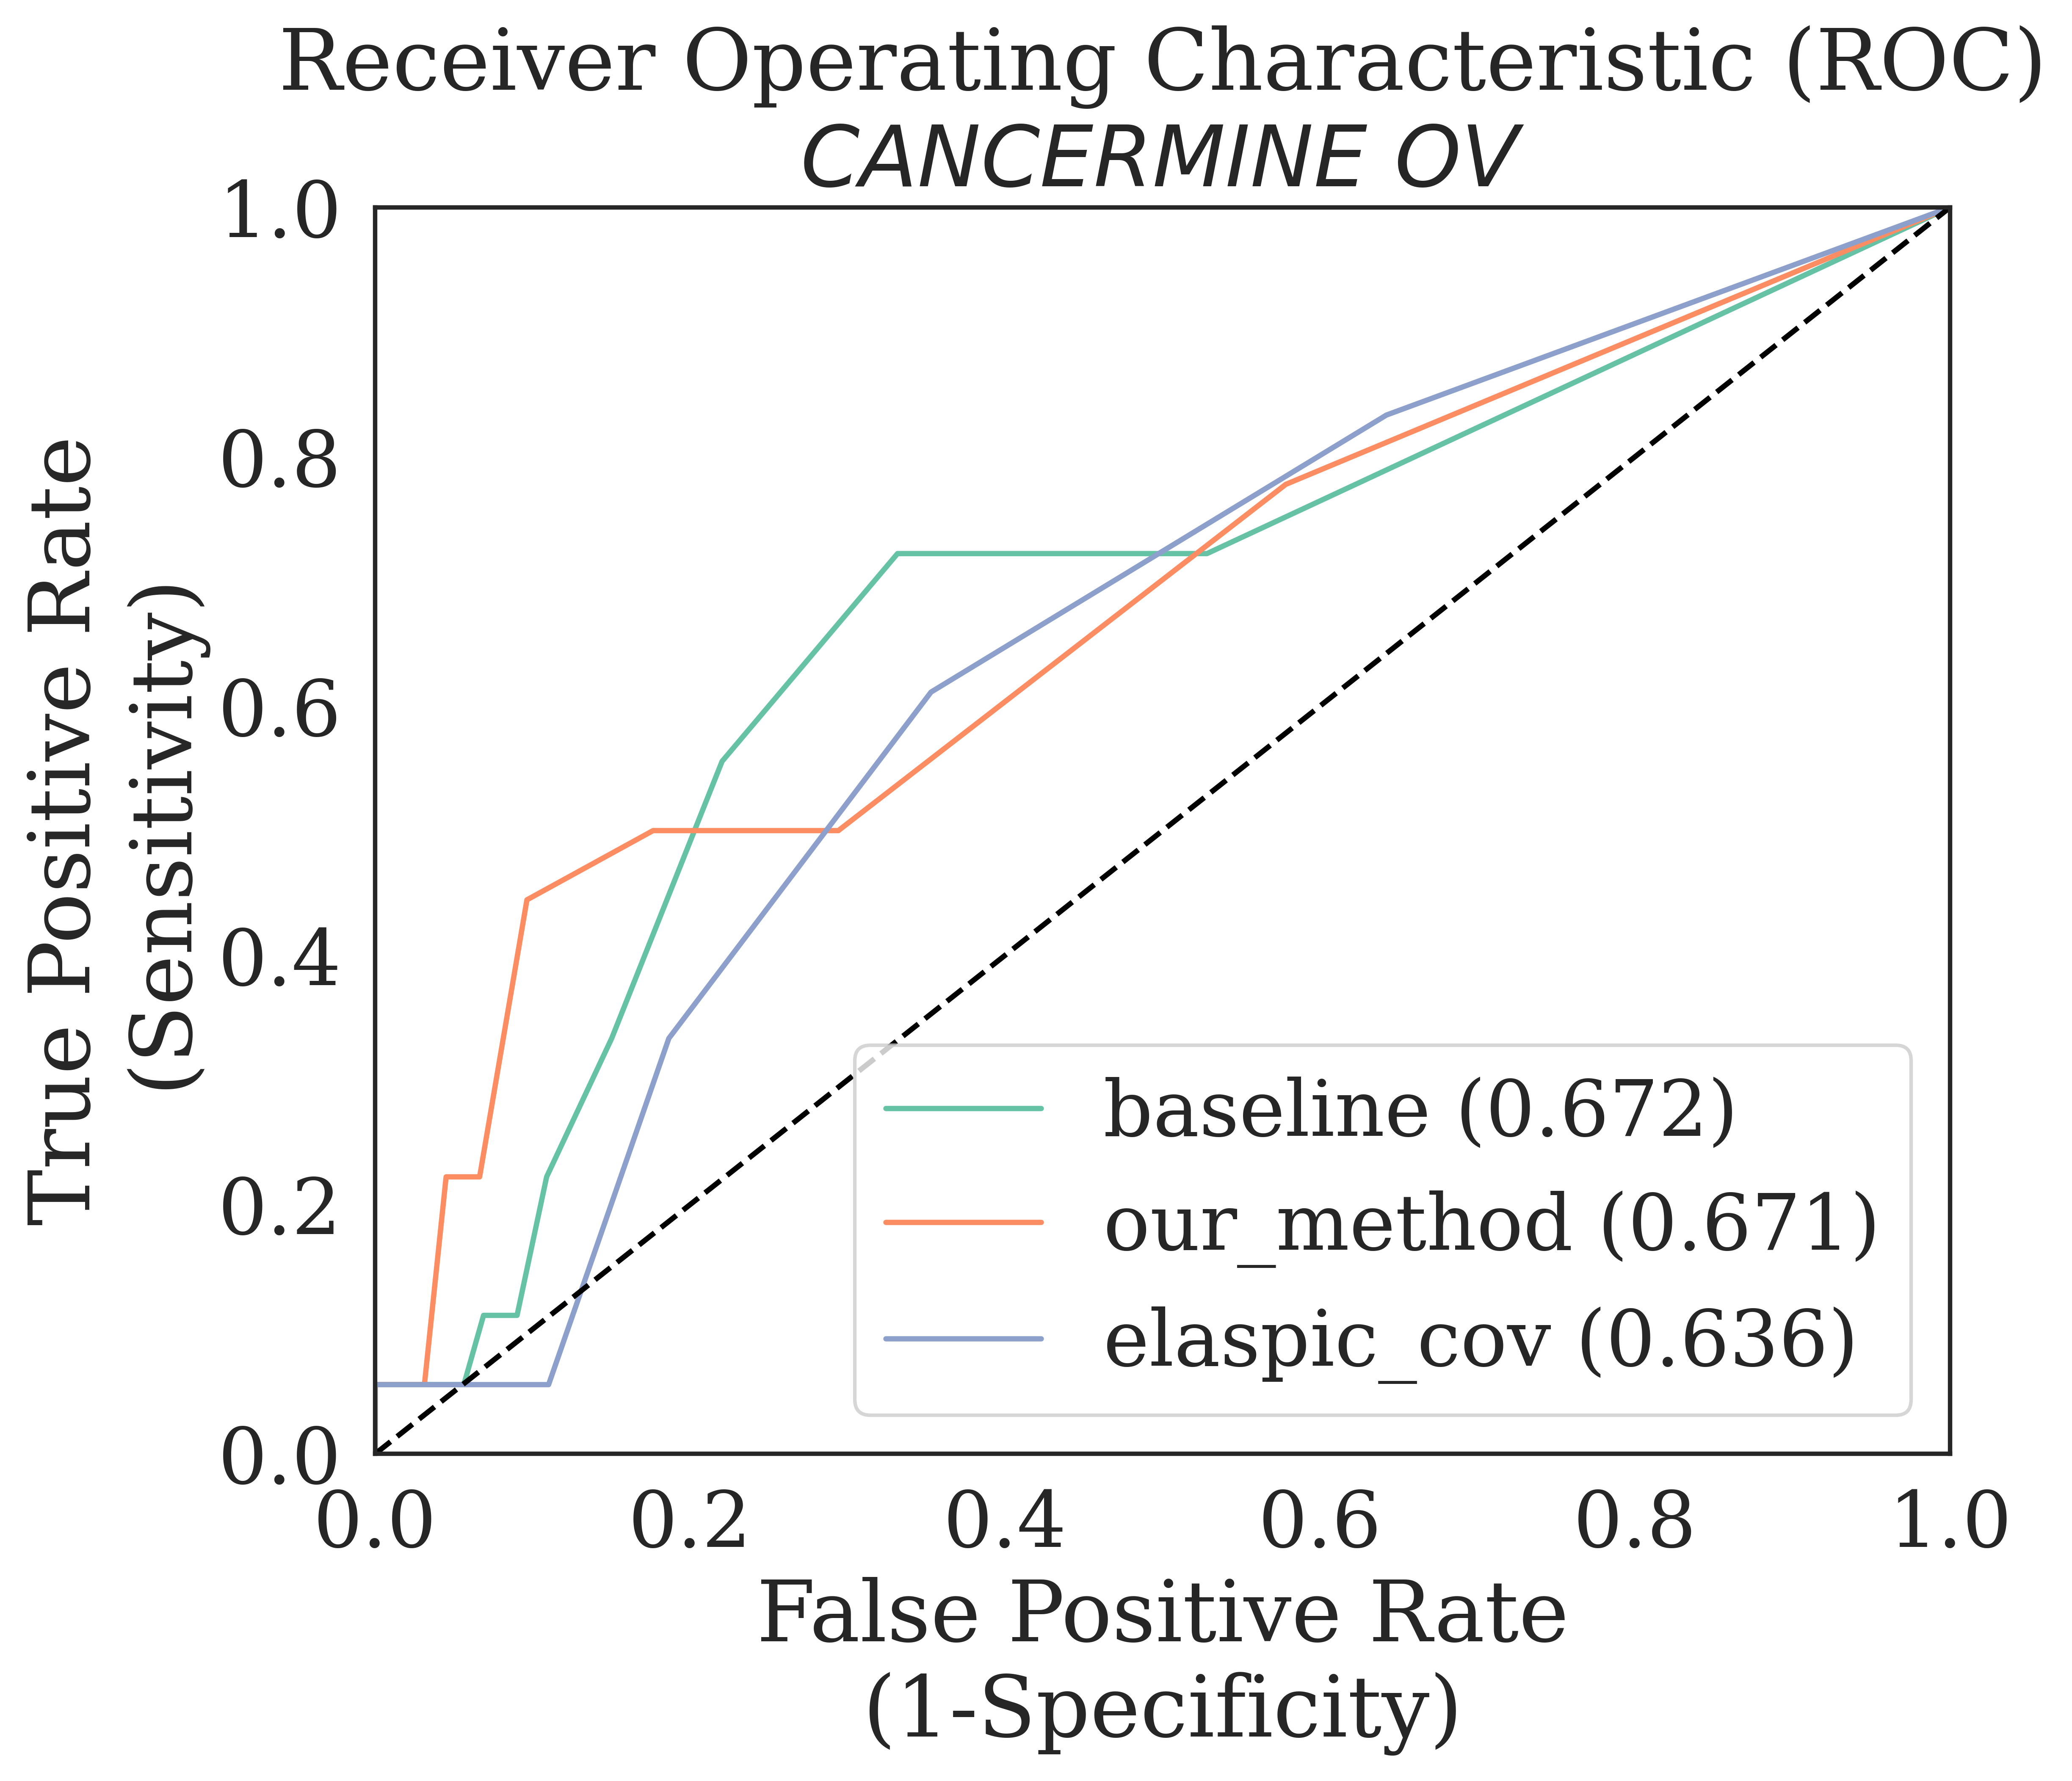

2021-11-17 20:53:50 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.672
2021-11-17 20:53:50 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.671
2021-11-17 20:53:50 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.636


In [27]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="ov_preliminary_data",
    state_variables=["CancerMine_STATUS", "CancerMine_STATUS (OV)"]
)

In [28]:
predator_analysis.export_auc_scores("auc_scores_cancermine", overwrite=True)

default default_ov baseline_nonzero baseline_nonzero_ov
Method                                                             
BASELINE      0.579      0.708            0.555               0.672
OURS          0.557      0.670            0.557               0.671
ELASPIC_COV   0.530      0.589            0.550               0.636

2021-11-17 20:53:50 | INFO     | helpers.helpers_analysis.common | AUC scores are saved into file ..\data\predictions_datasets\ov_prediction_2021-11-17\37bf1637\auc_scores_cancermine_2021-11-17.csv


# Save to Excel file

In [29]:
from helpers.helpers_analysis.common import save_to_excel

In [30]:
save_to_excel(
    prediction_file_path=predator_analysis.prediction_data_path,
    preliminary_data=predator_analysis.data_materials["ov_preliminary_data"],
    file_name="ov_preliminary_data_cancermine",
    export_flag=True
)

2021-11-17 20:53:54 | DEBUG    | helpers.helpers_analysis.common | ..\data\predictions_datasets\ov_prediction_2021-11-17\37bf1637\ov_preliminary_data_cancermine_2021-11-17.xlsx is exported.
2021-11-17 20:53:54 | DEBUG    | helpers.helpers_analysis.common | descriptions_..\data\predictions_datasets\ov_prediction_2021-11-17\37bf1637\ov_preliminary_data_cancermine_2021-11-17_descriptions.xlsx is exported.


---

In [32]:
# done